# import

In [64]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp2d
from emgineer import EmgDecomposition, plot_spikes
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv(
    'G:\共有ドライブ\MFG\project\Biomedical engineering\Project プロジェクト\Bionic hand\EMG実験/1016wei/five1.csv',
    header=None)
df.shape

(128, 71009)

In [120]:
df_use = df.T.iloc[2000:, :64]

# NMF

In [42]:
df_rms = df_use.pow(2).rolling(300).mean().apply(np.sqrt, raw=True).dropna()
df_rms = df_rms / df_rms.values.max()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

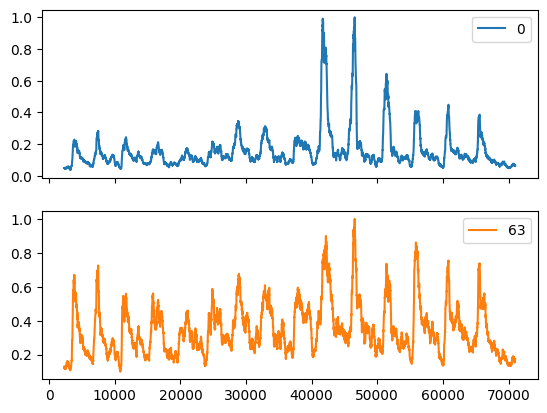

In [5]:
df_rms.iloc[:, [0, 63]].plot(subplots=True)

In [58]:
from sklearn.decomposition import NMF

n_conpoments = 20
nmf = NMF(n_components=n_conpoments, random_state=0, max_iter=1000, init='nndsvd')
nmf.fit(df_rms)
W = nmf.transform(df_rms)

est = EmgDecomposition(-1)
st_nmf = est._EmgMu2spikeTrain(W)


c:\Users\naoki\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


## svd

In [30]:
from sklearn.utils.extmath import randomized_svd

mat_rms = df_rms.values
U, S, V = randomized_svd(mat_rms, n_components=20)

_est = EmgDecomposition(-1)
st_svd = _est._EmgMu2spikeTrain(U)

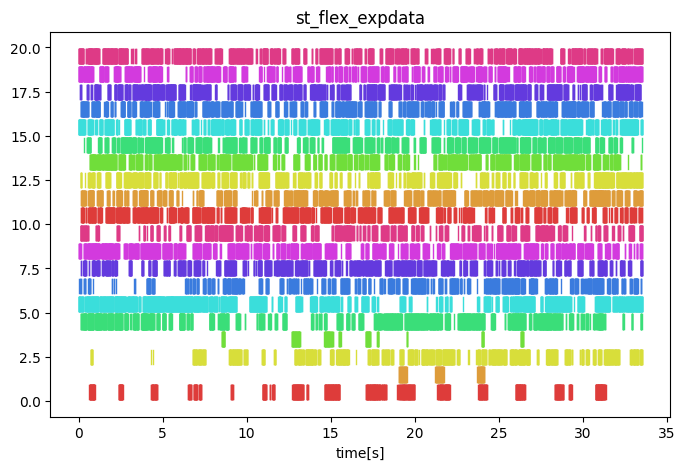

In [27]:
plot_spikes(st_svd, title='st_flex_expdata')

<Figure size 1200x800 with 0 Axes>

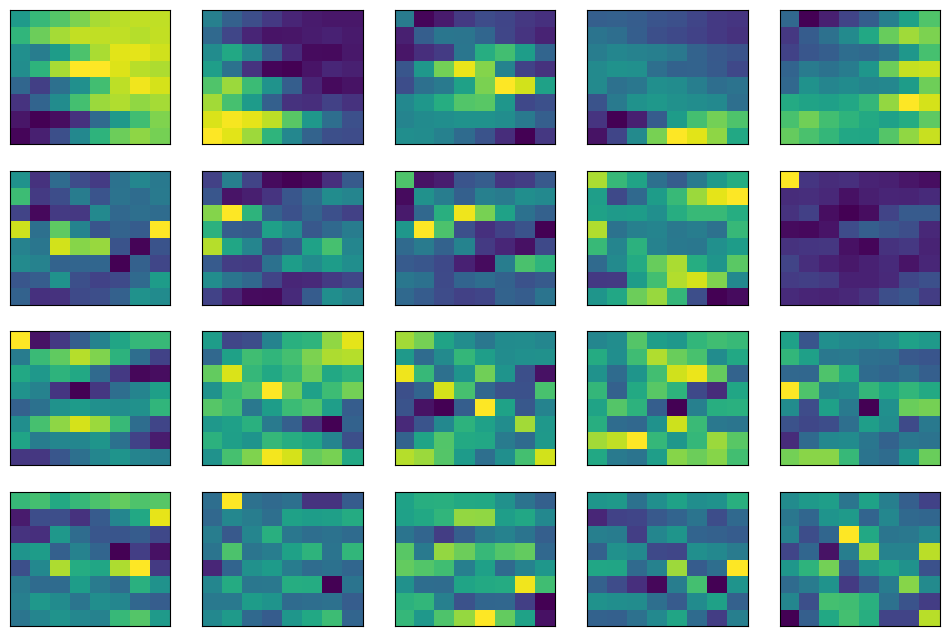

In [28]:
n_comp = 20

plt.rcParams['figure.figsize'] = (12.0, 8.0)
fig = plt.figure()
fig, axes = plt.subplots(nrows=-(-n_comp//5), ncols=5, sharex=False)
for i in range(n_comp):
    _electrodes = V[i].reshape((8, 8))
    axes[i//5, i%5].pcolor(_electrodes)
    axes[i//5, i%5].tick_params(
        labelbottom=False,
        labelleft=False,
        labelright=False,
        labeltop=False,
        bottom=False,
        left=False,
        right=False,
        top=False)

In [51]:
from scipy import signal
mat_use = signal.resample(df_use.values, len(df_use) // 5)
mat_use = mat_use/ df_use.values.max()
_U, _S, _V = randomized_svd(mat_use, n_components=20)

_est = EmgDecomposition(-1)
_st_svd = _est._EmgMu2spikeTrain(np.square(_U))

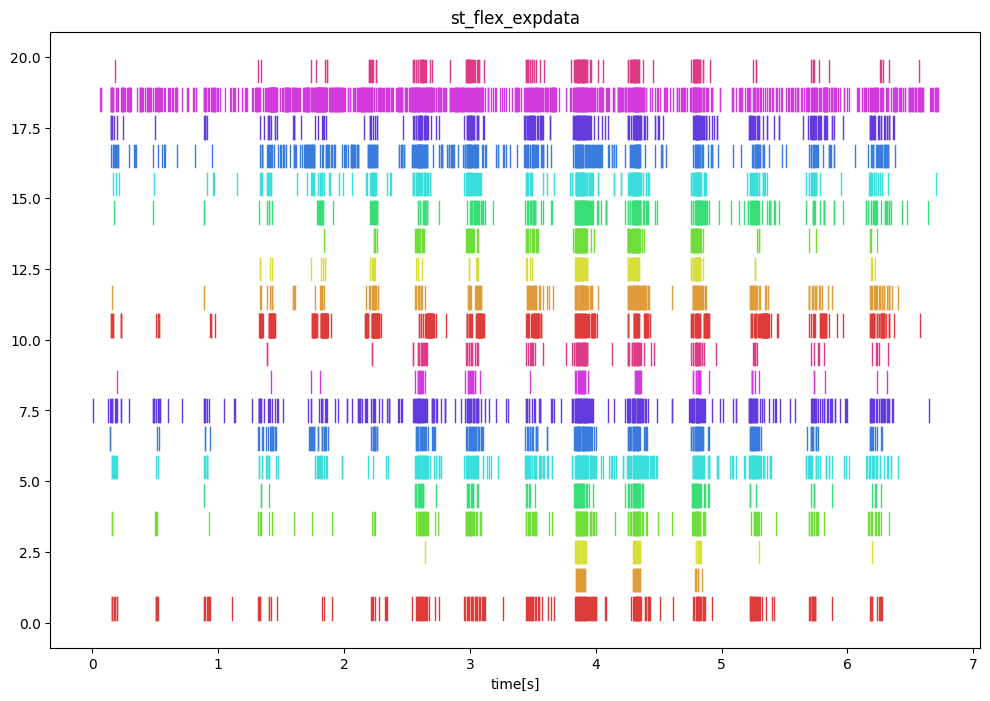

In [53]:
plot_spikes(_st_svd, title='st_flex_expdata')

<Figure size 1200x800 with 0 Axes>

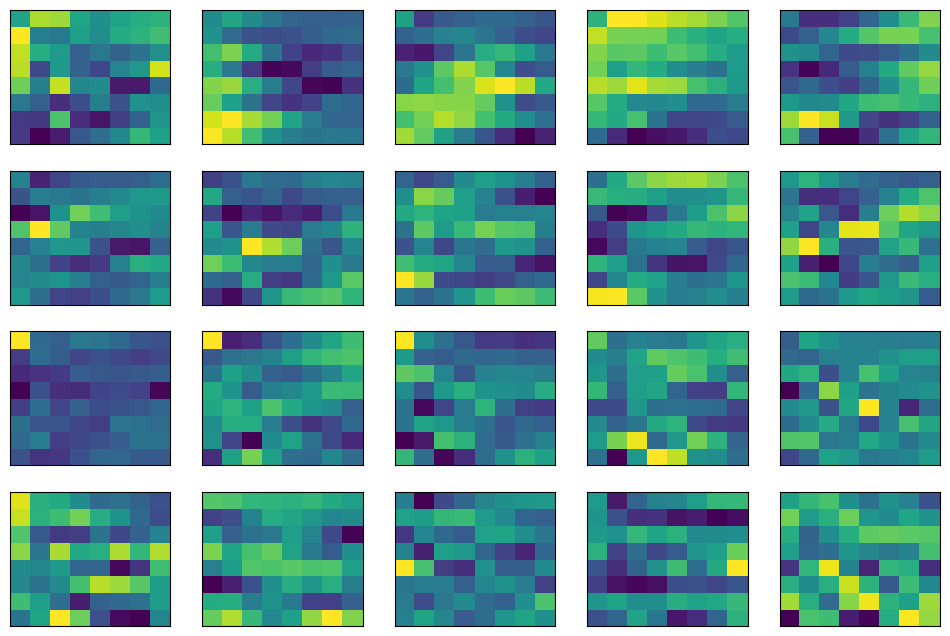

In [54]:
n_comp = 20

plt.rcParams['figure.figsize'] = (12.0, 8.0)
fig = plt.figure()
fig, axes = plt.subplots(nrows=-(-n_comp//5), ncols=5, sharex=False)
for i in range(n_comp):
    _electrodes = _V[i].reshape((8, 8))
    axes[i//5, i%5].pcolor(_electrodes)
    axes[i//5, i%5].tick_params(
        labelbottom=False,
        labelleft=False,
        labelright=False,
        labeltop=False,
        bottom=False,
        left=False,
        right=False,
        top=False)

## 可視化

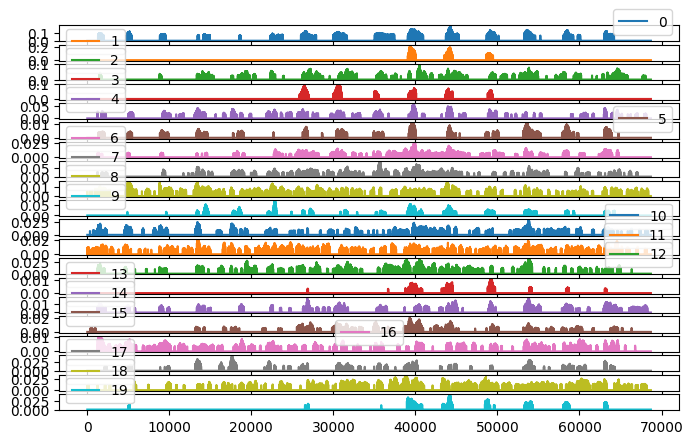

In [59]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
_ = pd.DataFrame(W*st_nmf).plot(subplots=True)

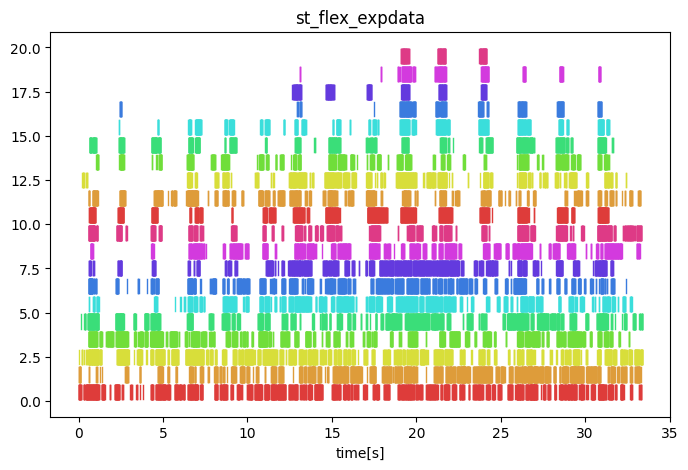

In [60]:
st_nmf_sorted = st_nmf[:, np.argsort(st_nmf.sum(axis=0))[::-1]]
plot_spikes(st_nmf_sorted, title='st_flex_expdata')

<Figure size 1200x800 with 0 Axes>

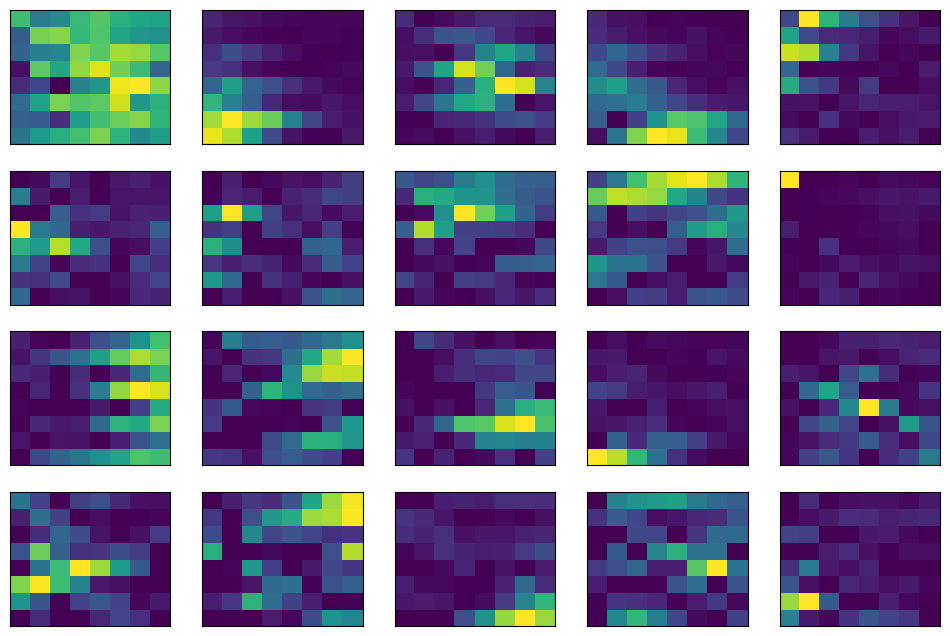

In [61]:
H = nmf.components_

n_comp = H.shape[0]

plt.rcParams['figure.figsize'] = (12.0, 8.0)
fig = plt.figure()
fig, axes = plt.subplots(nrows=-(-n_comp//5), ncols=5, sharex=False)
for i in range(n_comp):
    _electrodes = H[i].reshape((8, 8))
    axes[i//5, i%5].pcolor(_electrodes)
    axes[i//5, i%5].tick_params(
        labelbottom=False,
        labelleft=False,
        labelright=False,
        labeltop=False,
        bottom=False,
        left=False,
        right=False,
        top=False)

<Figure size 1200x800 with 0 Axes>

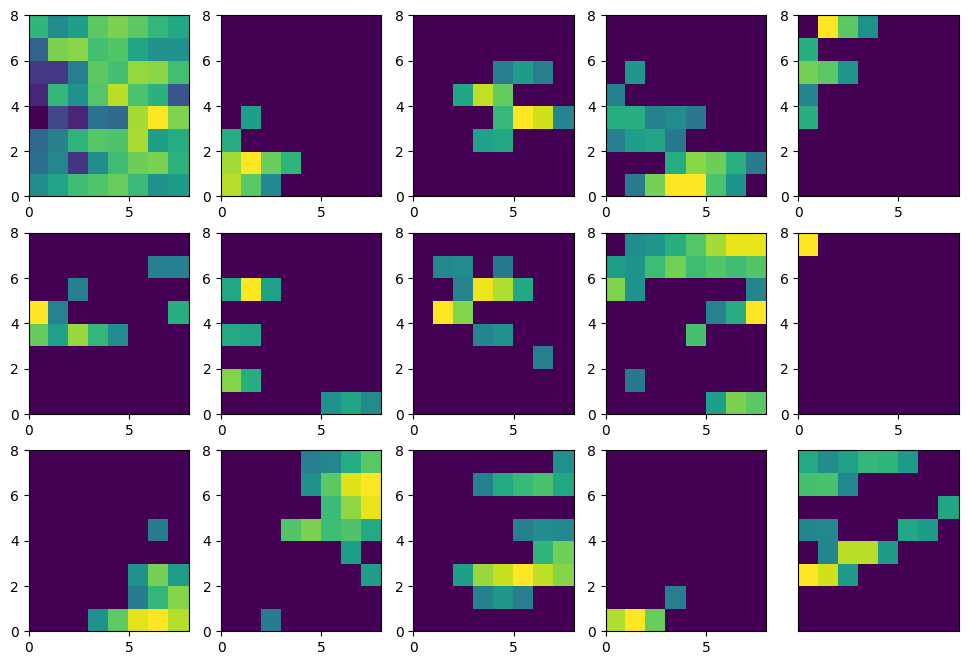

In [56]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
fig = plt.figure()
fig, axes = plt.subplots(nrows=-(-n_comp//5), ncols=5, sharex=False)
for j in range(n_comp):
    basis = H[j].reshape((8, 8))

    axes[j//5, j%5].pcolor((basis > basis.max() * 0.4) *basis)
    axes[i//5, i%5].tick_params(
        labelbottom=False,
        labelleft=False,
        labelright=False,
        labeltop=False,
        bottom=False,
        left=False,
        right=False,
        top=False)

## ほかのデータに適用

In [457]:
df_2 = pd.read_csv(
    'G:\共有ドライブ\MFG\project\Biomedical engineering\Project プロジェクト\Bionic hand\EMG実験/1016wei/five2.csv',
    header=None)

In [458]:
df_2_use = df_2.T.iloc[2000:, :64]
df_2_rms = df_2_use.pow(2).rolling(300).mean().apply(np.sqrt, raw=True).dropna()
W_2 = nmf.transform(df_2_rms)
st_2_nmf = est._EmgMu2spikeTrain(W_2)

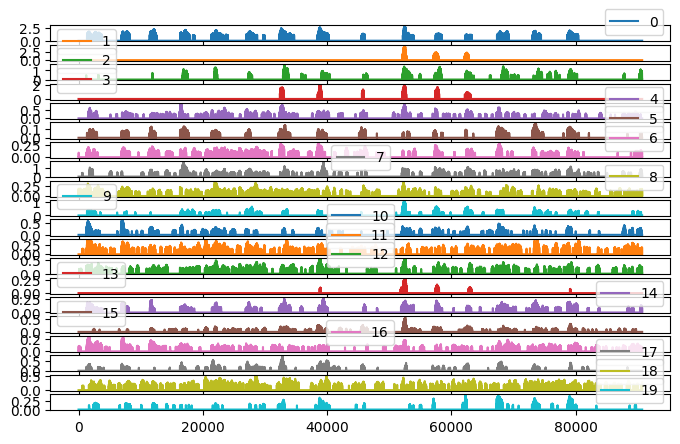

In [459]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
_ = pd.DataFrame(W_2*st_2_nmf).iloc[:, :20].plot(subplots=True)

# ICA

In [173]:
emg_flex = df_use.values

est_flex = EmgDecomposition(
    n_motor_unit=40,
    n_delayed=8,
    random_state=0,
    cashe='1016wei_five1_flex',
    flag_sil=False,
    flag_pca=False)
est_flex.fit(emg_flex)
st_flex, mu_flex = est_flex.transform(emg_flex)

In [115]:
def plot_sensor_grid(M, n_lim=None, figsize=(16.0, 10.0), cmap='viridis', interporate_rate=1):
    if n_lim is None:
        n_lim = M.shape[0]
    plt.rcParams['figure.figsize'] = figsize
    fig = plt.figure()
    fig, axes = plt.subplots(nrows=-(-n_lim//5), ncols=5, sharex=False)
    for i in range(n_lim):
        _electrodes = M[i, :64].reshape((8, 8))
        if interporate_rate != 1:
            _electrodes = interporate_grid(_electrodes, rate=interporate_rate)
        axes[i//5, i%5].pcolor(_electrodes, cmap=cmap)
        axes[i//5, i%5].tick_params(
            labelbottom=False,
            labelleft=False,
            labelright=False,
            labeltop=False,
            bottom=False,
            left=False,
            right=False,
            top=False)
        axes[i//5, i%5].set_title('MU ' + str(i))

def interporate_grid(Z, rate=2):
    x = np.linspace(0, 7, 8)
    y = np.linspace(0, 7, 8)
    
    x2 = np.linspace(0, 7, int(8 * rate))
    y2 = np.linspace(0, 7, int(8 * rate))
    # X2, Y2 = np.meshgrid(x2, y2)

    f = interp2d(x, y, Z, kind='cubic')
    Z2 = f(x2, y2)
    return Z2

<Figure size 1600x1000 with 0 Axes>

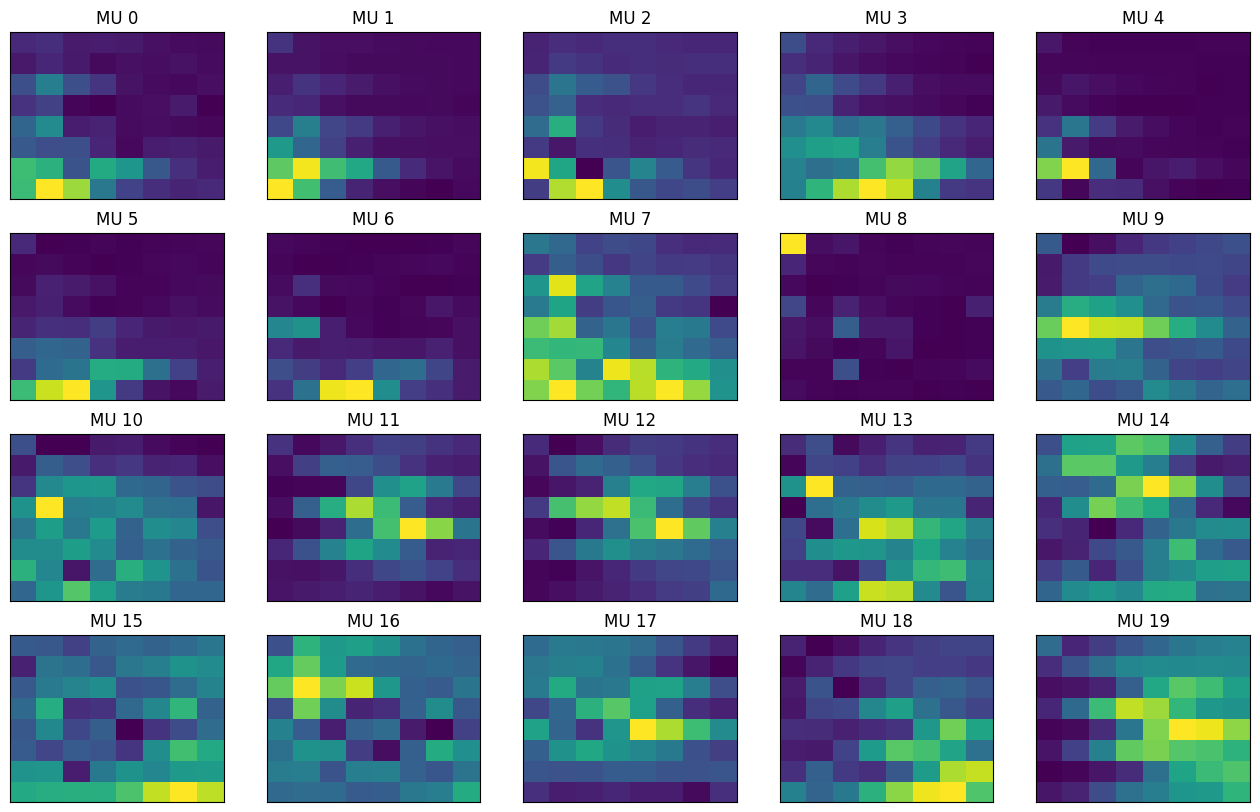

In [174]:
# ここで、C = np.dot(ummixing_matrix, whitening_matrix)
C = est_flex._FastICA.mixing_.T

# extendした信号を足し合わせる, spike trainsを算出するとき負の値は二乗されて正になるので、square(absでもできるが強調のためsquare)
mix_all = np.square(C).reshape((C.shape[0], -1, 64)).sum(axis=1)

plot_sensor_grid(mix_all, n_lim=20, interporate_rate=1)

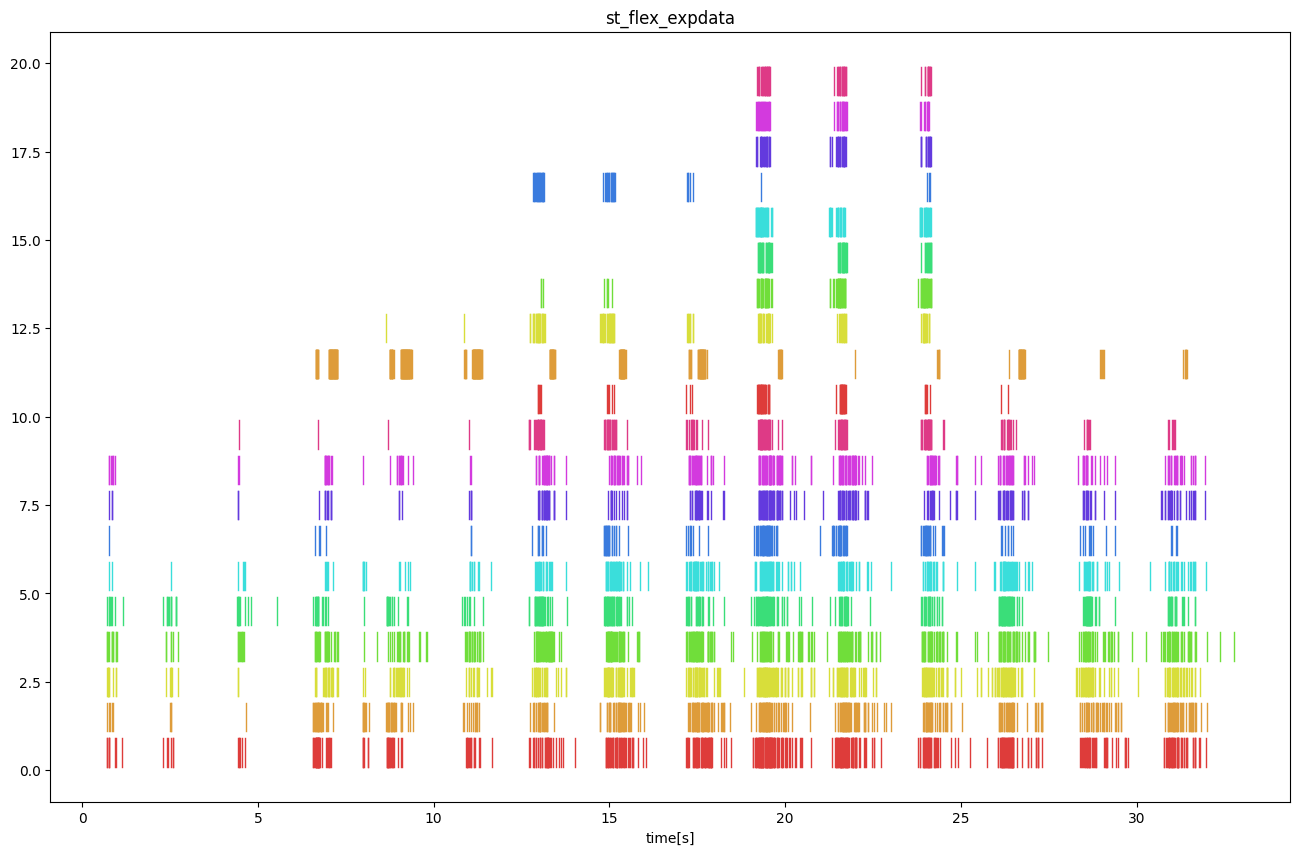

In [175]:
plot_spikes(st_flex[:, :20][:, ::-1], title='st_flex_expdata')

# その他解析

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

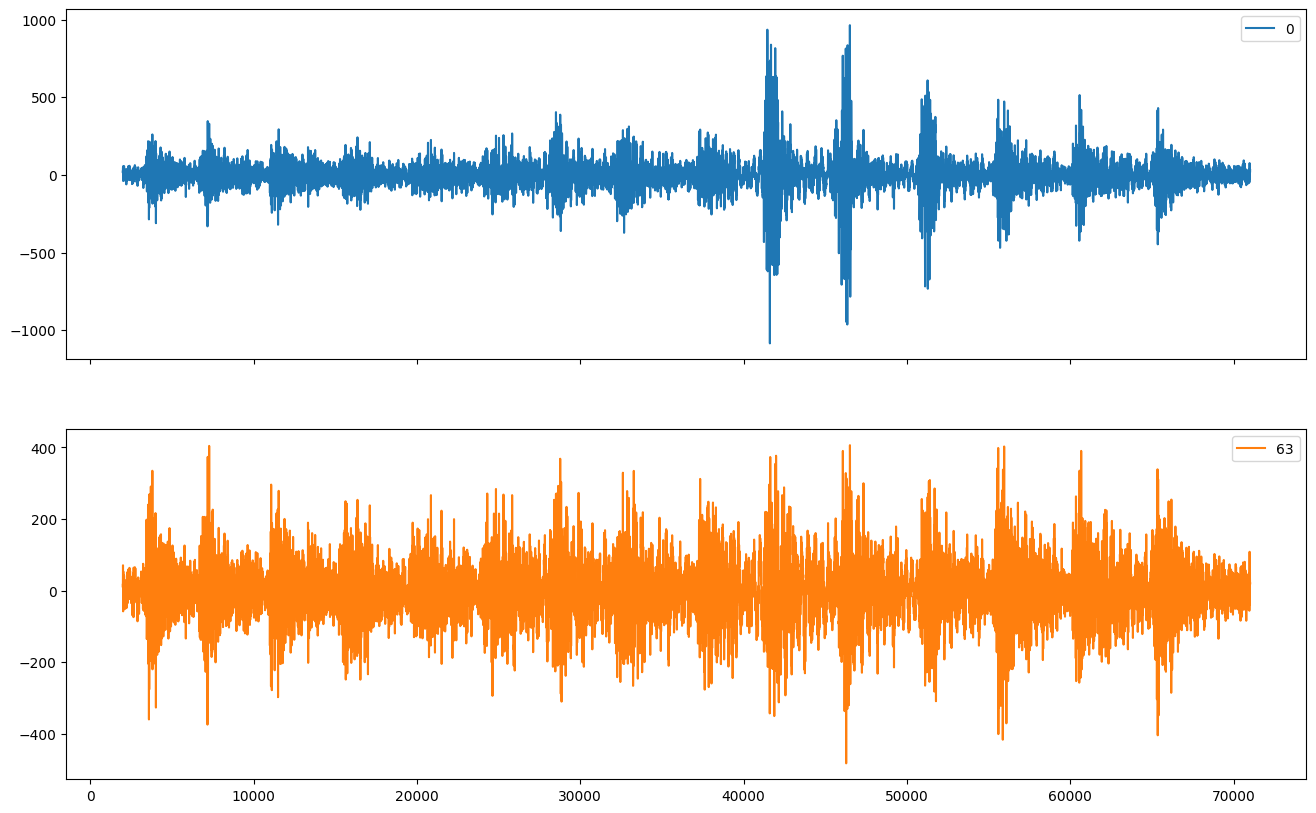

In [93]:
df_use.iloc[:, [0, 63]].plot(subplots=True)

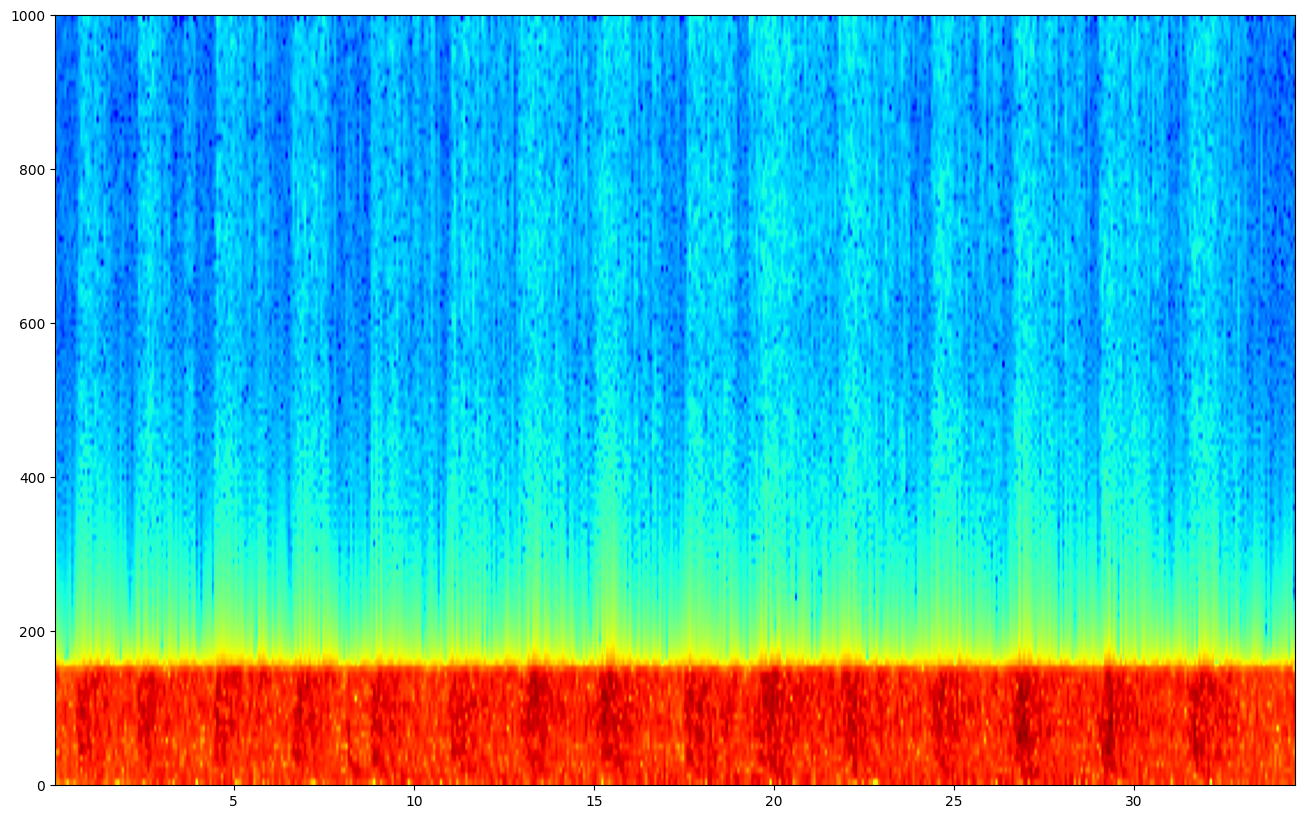

In [361]:
_, _ ,_, _ = plt.specgram(mu_flex[:, 15], Fs=2000, cmap = 'jet', mode='magnitude')

C:\Users\naoki\AppData\Local\Temp\ipykernel_26640\3969206274.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, frq, Pxx, cmap = 'jet')


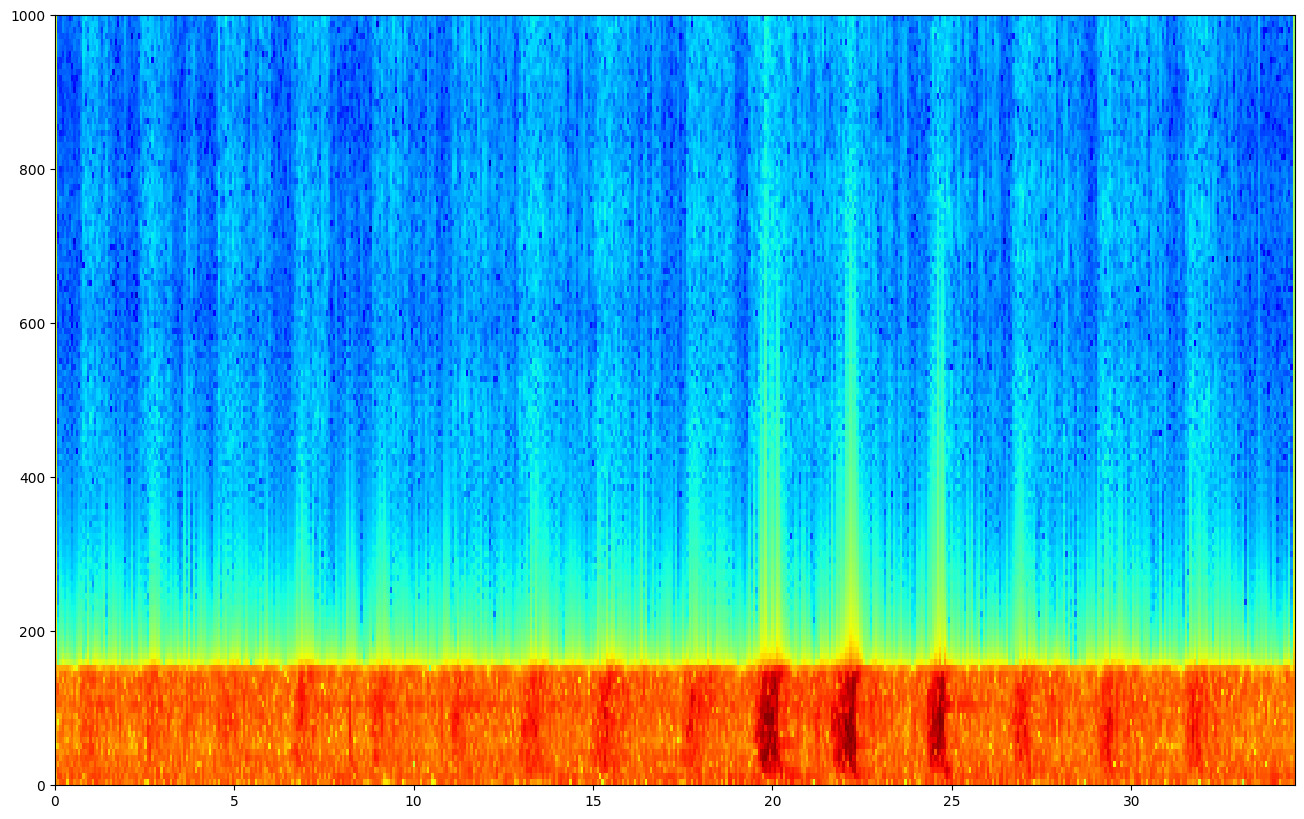

In [362]:
from scipy import signal
fs= 2000

frq, t, Pxx = signal.stft(mu_flex[:, 0], fs=fs) #周波数、時間、強さの3つの情報が帰ってくる
Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す
plt.pcolormesh(t, frq, Pxx, cmap = 'jet')

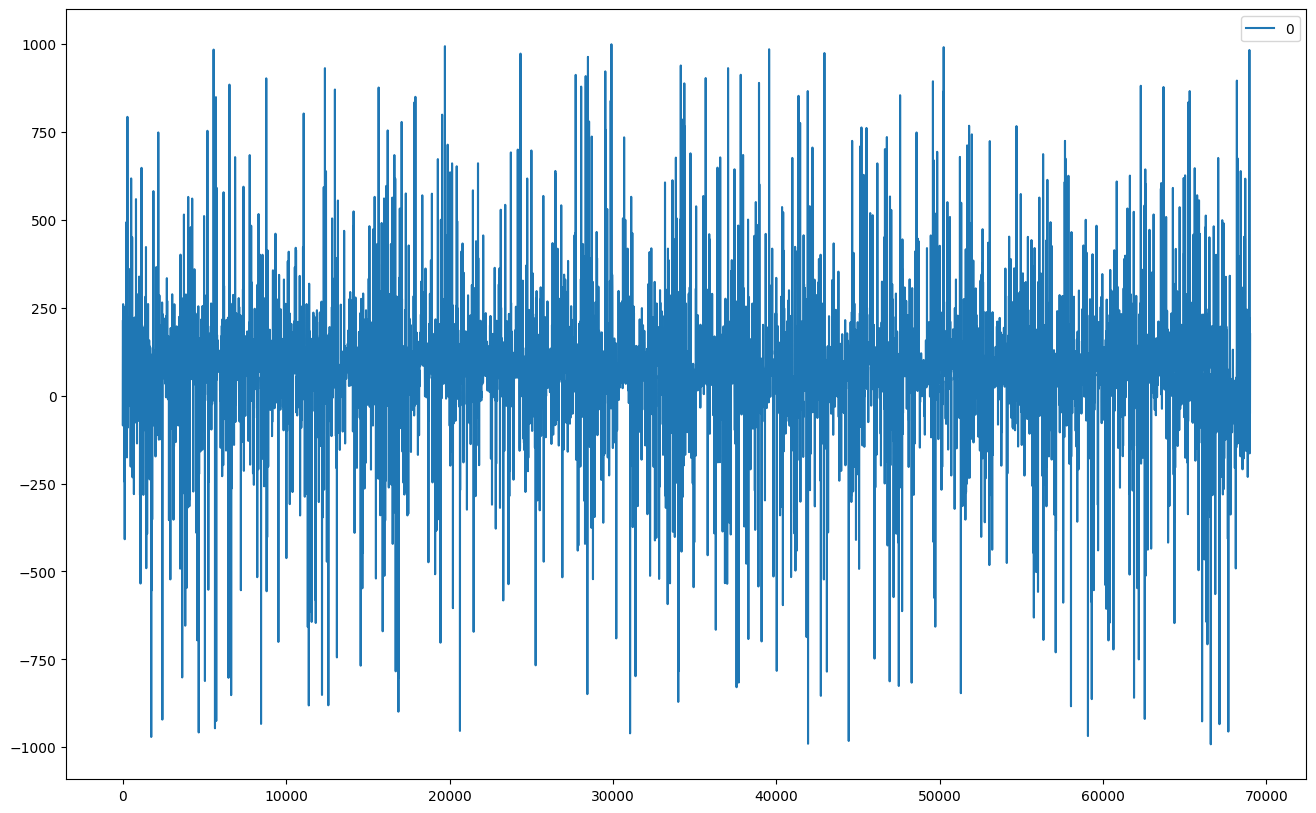

In [364]:
from scipy import signal
fs = 2000

z = signal.hilbert(mu_flex[:, 0])
phase = np.unwrap(np.angle(z))
frq = np.diff(phase) / (2 * np.pi) * fs
df_tmp = pd.DataFrame(frq).plot()